In [127]:
import requests  # For sending GET requests from the API
import os # For saving access tokens and for file management when creating and adding to the dataset
import json  # For dealing with json responses we receive from the API
import pandas as pd  # For displaying the data after
import csv  # For saving the response data in CSV format
import datetime  # For parsing the dates received from twitter in readable formats
import dateutil.parser
import unicodedata
import time  #To add wait time between requests
from dotenv import dotenv_values  # to import environment variables
from typing import Dict
import matplotlib.pyplot as plt

In [12]:
# Import env variables into static vars
config = dotenv_values(".env")
API_KEY = config.get("API_KEY")
API_SECRET_KEY = config.get("API_SECRET_KEY")
API_BEARER_TOKEN = config.get("API_BEARER_TOKEN")

In [122]:
ministers_twitter_handles = {
    "Volker Wissing": 'wissing',
    "Christian Lindner": "c_lindner",
    "Karl Lauterbach": "Karl_Lauterbach",
    "Annalena Baerbock": "ABaerbock",
    "Nancy Faeser": "NancyFaeser",
    "Marco Buschmann": "MarcoBuschmann",
    "Hubertus Heil": "hubertus_heil",
    "Cem Özdemir": "cem_oezdemir",
    "Steffi Lemke": "SteffiLemke",
    "Bettina Stark-Watzinger": "starkwatzinger",
    "Svenja Schulze": "SvenjaSchulze68",
    "Klara Geywitz": "klara_geywitz",
    "Wolfgang Schmidt": "W_Schmidt_"
}

{'Volker Wissing': 'wissing', 'Christian Lindner': 'c_lindner', 'Karl Lauterbach': 'Karl_Lauterbach', 'Annalena Baerbock': 'ABaerbock', 'Nancy Faeser': 'NancyFaeser', 'Marco Buschmann': 'MarcoBuschmann', 'Hubertus Heil': 'hubertus_heil', 'Cem Özdemir': 'cem_oezdemir', 'Steffi Lemke': 'SteffiLemke', 'Bettina Stark-Watzinger': 'starkwatzinger', 'Svenja Schulze': 'SvenjaSchulze68', 'Klara Geywitz': 'klara_geywitz', 'Wolfgang Schmidt': 'W_Schmidt_'}


In [123]:
# construct GET request
def account_info_params(twitter_handle: str) -> Dict[str, str]:
    return {"usernames": f"{twitter_handle.lower()}", "user.fields": "created_at,description,id,location,name,profile_image_url,protected,public_metrics,url,username,verified,withheld"}

headers = {"Authorization": f"Bearer {API_BEARER_TOKEN}"}
url = "https://api.twitter.com/2/users/by"

minister_bio = []

for minister_handle in ministers_twitter_handles.values():
    response = requests.request("GET", url, headers = headers, params=account_info_params(minister_handle.lower()))
    if response.status_code == 200:
        raw_response_data = response.json()["data"][0]
        public_metrics_data = raw_response_data.pop("public_metrics")
        raw_response_data.update(public_metrics_data)
        minister_bio.append(raw_response_data)
    time.sleep(0.2)

# print(type(minister_bio))
print(f"INFO: {len(minister_bio)}/{len(ministers_twitter_handles)} Twitter accounts of ministers with Twitter handles fetched.")

INFO: 13/13 Twitter accounts of ministers with Twitter handles fetched.


In [125]:
keys = minister_bio[0].keys()
with open('data/minister_info.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(minister_bio)

In [126]:
df = pd.read_csv("data/minister_info.csv")
df.head()

,description,name,created_at,location,verified,profile_image_url,protected,username,url,id,followers_count,following_count,tweet_count,listed_count
0,"Bundesminister für Digitales und Verkehr, Vors...",Volker Wissing,2009-02-11T14:34:58.000Z,"Schillerstraße 11a, 55116 Mainz",True,https://pbs.twimg.com/profile_images/140805921...,False,Wissing,https://t.co/QyGCyDDccr,20593301,31059,998,13159,616
1,Bundesminister der Finanzen. Bundesvorsitzende...,Christian Lindner,2010-03-11T16:11:51.000Z,"Berlin, Deutschland",True,https://pbs.twimg.com/profile_images/128403007...,False,c_lindner,https://t.co/mJgVJTabCr,122104353,549219,1371,17671,2406
2,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...",Prof. Karl Lauterbach,2015-05-21T14:01:21.000Z,"Berlin, Deutschland",True,https://pbs.twimg.com/profile_images/601388878...,False,Karl_Lauterbach,https://t.co/aNTUPwOxBp,3292982985,826528,296,9569,2806
3,Offizieller Twitter Account von Außenministeri...,Außenministerin Annalena Baerbock,2021-12-10T11:15:44.000Z,Berlin,True,https://pbs.twimg.com/profile_images/146932792...,False,ABaerbock,https://t.co/bR6R0XD5I5,1469264387512979461,90841,39,7,248
4,Bundesministerin des Innern und für Heimat | V...,Nancy Faeser,2012-06-27T16:33:18.000Z,Hessen,True,https://pbs.twimg.com/profile_images/132101093...,False,NancyFaeser,https://t.co/Zu3jph3Ylw,620221740,53763,386,1081,340


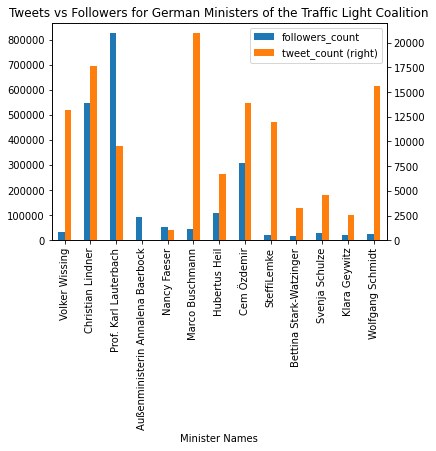

In [143]:
# Some visualization
ratio_plt = df.plot(kind= "bar", x="name", y=["followers_count", "tweet_count"], secondary_y="tweet_count")
ratio_plt.set_title("Tweets vs Followers for German Ministers of the Traffic Light Coalition")
ratio_plt.set_xlabel("Minister Names")
plt.show()